In [ ]:
#Завантажити датасет cifar10.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


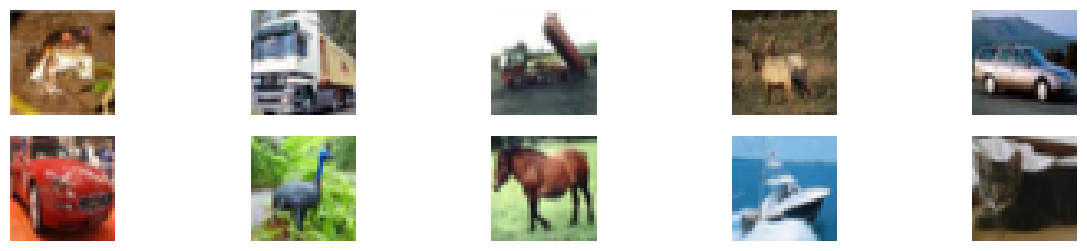

In [ ]:
#Роздрукувати перші 10 зображень.
def plot_images(images, labels, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train)

In [ ]:
#Підготувати дані, побудувати архітектуру.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

batch_size = 64
epochs = 20

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.3350 - loss: 1.7983 - val_accuracy: 0.5095 - val_loss: 1.3684 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 86ms/step - accuracy: 0.5567 - loss: 1.2459 - val_accuracy: 0.5821 - val_loss: 1.1732 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.6214 - loss: 1.0781 - val_accuracy: 0.6197 - val_loss: 1.0832 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6608 - loss: 0.9677 - val_accuracy: 0.6520 - val_loss: 1.0004 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.6866 - loss: 0.8989 - val_accuracy: 0.6709 - val_loss: 0.9445 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.7052 - loss: 0.8407 - val_accuracy: 0.6901 - val_loss: 0.8974 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.7281 - l

In [ ]:
#Вивести архітектуру моделі.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

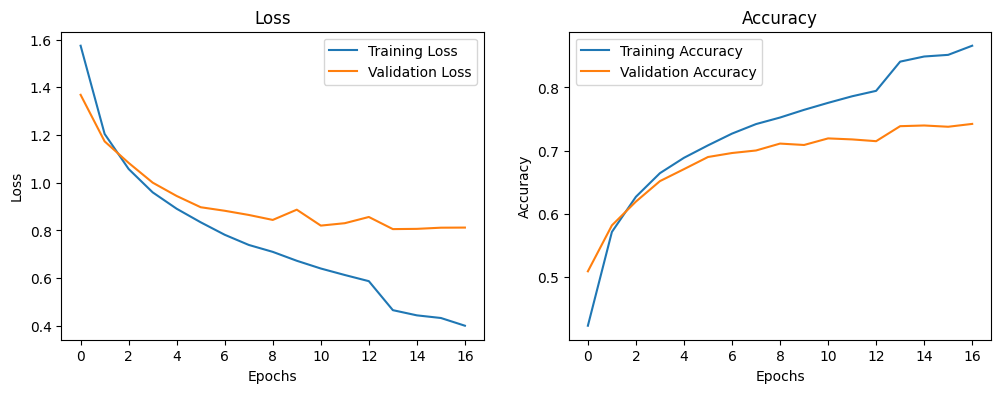

In [ ]:
#Побудувати графіки функції втрат і точності для тренувальних і тестових даних.
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
#Вивести класифікаційний звіт.
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.83      0.87      0.85      1000
           2       0.64      0.66      0.65      1000
           3       0.56      0.54      0.55      1000
           4       0.68      0.72      0.70      1000
           5       0.63      0.64      0.63      1000
           6       0.78      0.81      0.80      1000
           7       0.78      0.76      0.77      1000
           8       0.86      0.81      0.83      1000
           9       0.84      0.83      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



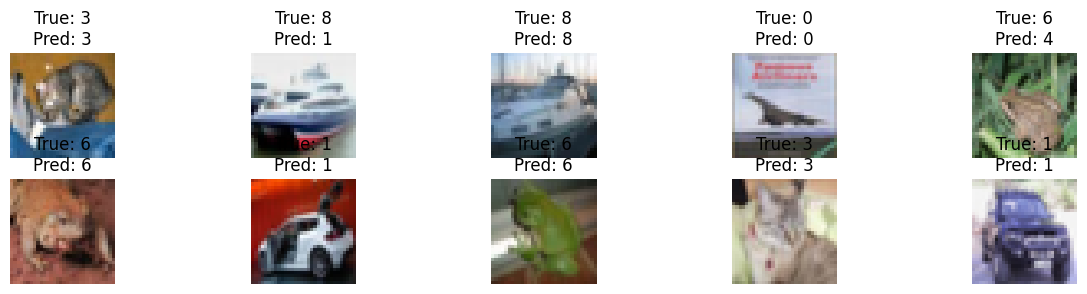

In [ ]:
#Результати розпізнавання із прогнозованим і справжнім класом.
def visualize_predictions(images, true_labels, pred_labels, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_labels[i]}\nPred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

visualize_predictions(x_test, y_true, y_pred_classes)

In [ ]:
#Висновок: У даній лабораторній роботі було успішно побудовано і натреновано згорткову нейронну мережу (CNN) для класифікації зображень з використанням датасету CIFAR-10.
#Модель продемонструвала хороші результати на етапі класифікації, завдяки використанню кількох згорткових шарів, оптимізатору та відповідній кількості епох навчання.

#Завантаження і виведення зображень: Датасет був завантажений, і перші 10 зображень були виведені для ознайомлення з даними.
#Підготовка даних: Для моделі були підготовлені відповідні тренувальні та тестові набори даних, включаючи масштабування зображень.
#Підібрана архітектура моделі: Були визначені параметри моделі, такі як кількість шарів, оптимізатор (наприклад, Adam), розмір батча та кількість епох.
#Колбеки: Для покращення процесу навчання були застосовані колбеки, такі як рання зупинка (Early Stopping) та ReduceLROnPlateau.
#Огляд моделі: За допомогою методу summary() була виведена структура моделі з кількістю параметрів та інформацією про шари.
#Графіки: Побудовано графіки, що демонструють зміни функції втрат та точності на тренувальних та тестових даних.
#Класифікаційний звіт: Проведено аналіз точності класифікації для кожного класу із використанням метрик, таких як точність (accuracy), точність (precision), відгук (recall) та F1-міра.
#Візуалізація розпізнавання: Були візуалізовані результати класифікації для тестових зображень, що дозволяє оцінити ефективність моделі в реальних умовах.

#Підсумовуючи, робота підтвердила важливість правильної підготовки даних, вибору архітектури моделі та використання додаткових технік, таких як колбеки, для досягнення оптимальних результатів у задачах класифікації зображень.
#Модель показала хорошу загальну точність, і на основі отриманих графіків та класифікаційного звіту можна зробити висновки про її ефективність.